<a href="https://colab.research.google.com/github/navyavemavarapu/Task_6/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [5]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Data cleaning

In [6]:
#Displaying top 3 rows
df.head(3)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3


In [7]:
df.isnull().sum() # no missing values

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [8]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


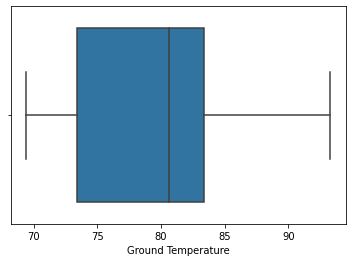

In [9]:
sns.boxplot('Ground Temperature',data=df)#no outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


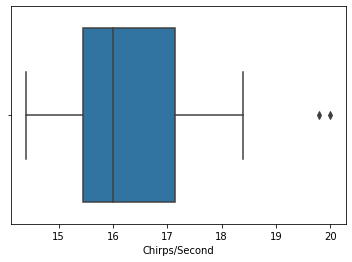

In [10]:
sns.boxplot('Chirps/Second',data=df)

In [11]:
df.duplicated().sum() # no duplicates

0

In [12]:
df.dtypes # data is structured 

Chirps/Second         float64
Ground Temperature    float64
dtype: object

# EDA

In [13]:
df.columns

Index(['Chirps/Second', 'Ground Temperature'], dtype='object')

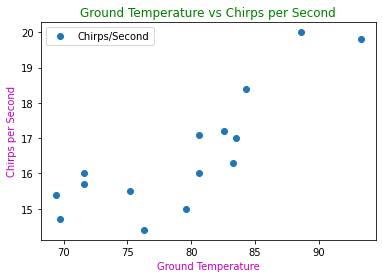

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [14]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps per Second',color='g')
plt.xlabel('Ground Temperature',color='m')
plt.ylabel('Chirps per Second',color='m')
plt.show()
df.corr()

There is a linear relationship between ground temperature and frequency. So we can go ahead and develop a linear regression model. No transformation required.

In [15]:
X = df[['Ground Temperature']]
y = df['Chirps/Second']

# Model training

In [16]:
from sklearn.linear_model import LinearRegression
line_regg = LinearRegression() # initialize #predicted frequency = m * Ground temp + c  
line_regg.fit(X,y) # #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [18]:
y_pred = line_regg.predict(X)

In [19]:
df2 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093


# Find the linear regression equation for this data.

In [20]:
c = line_regg.intercept_
print("The intercept value is :", c)

The intercept value is : 0.45931464523595267


In [21]:
m = line_regg.coef_
print("The value of coefficient (m) is :",m)

The value of coefficient (m) is : [0.20299973]


In [22]:
print("Linear regression equation for the given data is: Predicted chrips per second = (ground temperature) *", m ,"+",c) 

Linear regression equation for the given data is: Predicted chrips per second = (ground temperature) * [0.20299973] + 0.45931464523595267


# Chart the original data and the equation on the chart.

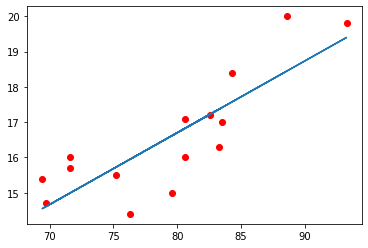

In [23]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred)
plt.show()

# Find the equation's R^2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529146998


# Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [25]:
print("The approximate rate of chirping is :",line_regg.predict([[95]]))

The approximate rate of chirping is : [19.74428913]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
#y = mx + c
x = (18-c)/m
print("Approximate temperature is:",x)